In [1]:
import sys
import rootpath
sys.path.append(rootpath.detect())

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np

In [3]:
from nbutils import Pareto_split, format_figures, save_fig
from testsuite.optimisers import Saf
from testsuite.surrogates import GP, MultiSurrogate

In [4]:
format_figures()

In [5]:
def image_infill(opt, front_value = 0., n_contours=20, uncertainty=0.1):
    #figure_properties
    fig = plt.figure(figsize=[8,7])
    ax = fig.gca()
    l_lims = opt.apply_weighting(np.array([[0, 0]]))
    u_lims = opt.apply_weighting(np.array([[1.5, 1.5]]))
    ax.set_xlim([0., 1.5])
    ax.set_ylim([0., 1.5])
    
    # compute infill
    M, N = 200, 200
    x = np.linspace(0., 1.5, M)
    y = np.linspace(0., 1.5, N)
    xx, yy = np.meshgrid(x, y)
    xy = np.vstack((xx.flat, yy.flat)).T
    xyw = opt.apply_weighting(xy)
    zz = np.array([opt._scalarise_y(xyi, np.ones_like(xyi)*uncertainty*opt.obj_weights, invert=False) for xyi in xyw])
    zz = zz.reshape(N,M)
    
    #image infill
    pcol = ax.pcolor(xx, yy, zz)
    levels = np.linspace(zz.min(), zz.max(), n_contours+2)[1:-1]
    ax.contour(xx, yy, zz, colors="white", levels=levels)
    if front_value is not None:
        ax.contour(xx, yy, zz, colors="C3", levels=[front_value])
        front_legend = plt.Line2D([0], [0], c="C3")
    
    # scatter samples
    ax.scatter(opt.d[:,0], opt.d[:,1], facecolors='none', edgecolors="C3", linewidth=2., label="dominated samples")
    ax.scatter(opt.p[:,0], opt.p[:,1], c="C3", label="non-dominated samples")
    fig.colorbar(pcol)
    handles, labels = ax.get_legend_handles_labels()
    if front_value is not None:
        handles.append(front_legend)
        labels.append("{}".format(front_value))
    ax.legend(handles, labels)
    
    return fig

In [6]:
seed = 1
INVERT = True
plt.rcParams['image.cmap'] = 'viridis'
n_contours=20

In [7]:
from testsuite.optimisers import Saf
saf_opt = Saf(objective_function=lambda x: x[0:2], ei=False,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)

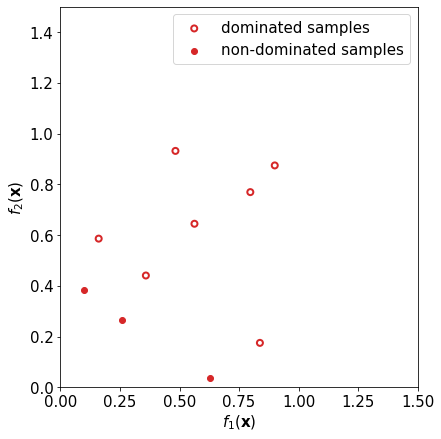

In [8]:
p, d = Pareto_split(saf_opt.y)

fig = plt.figure(figsize=[6.40,7])
ax = fig.gca()
ax.set_xlim([0., 1.5])
ax.set_ylim([0., 1.5])


M, N = 200, 200
x = np.linspace(0., 1.5, M)
y = np.linspace(0., 1.5, N)
xx, yy = np.meshgrid(x, y)
zz = np.zeros((M,N))

# pcol = ax.pcolor(xx, yy, zz)


ax.scatter(d[:,0], d[:,1], facecolors='none', edgecolors="C3", linewidth=2., label="dominated samples")
ax.scatter(p[:,0], p[:,1], c="C3", label="non-dominated samples")

ax.legend()
# fig.colorbar(pcol)
ax.set_xlabel("$f_1(\mathbf{x})$")
ax.set_ylabel("$f_2(\mathbf{x})$")

save_fig(fig, name="figure30_blank_objective_space")

In [9]:
targets = np.asarray([[0.5, 0.1], [0.3, 0.15]])

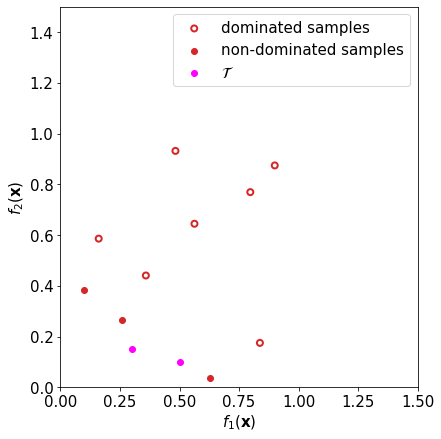

In [10]:
## plot x'
stds = [0.005, 0.01]
ax.scatter(*targets.T, c="magenta", label=r"$\mathcal{T}$")
ax.legend()
save_fig(fig, name="figure31_target_objective_space")
fig

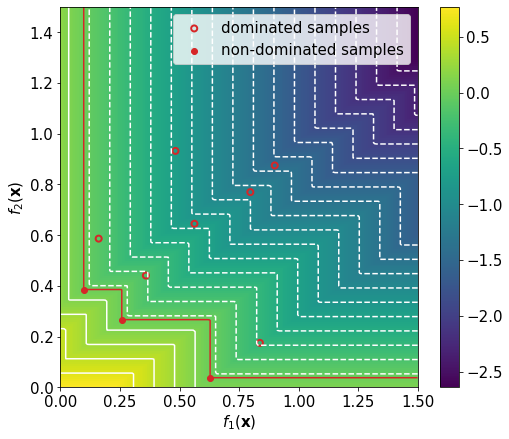

In [11]:
fig_saf = image_infill(saf_opt, n_contours=n_contours)
fig_saf.gca().set_xlabel("$f_1(\mathbf{x})$")
fig_saf.gca().set_ylabel("$f_2(\mathbf{x})$")
# fig_saf.gca().scatter(*x_, c="magenta", label=r"$\mathbf{x}'$")
fig_saf.gca().legend()
save_fig(fig_saf, name="figure32_saf_objective_space")

 /tmp/ipykernel_2093339/418229984.py:25: UserWarning:No contour levels were found within the data range.


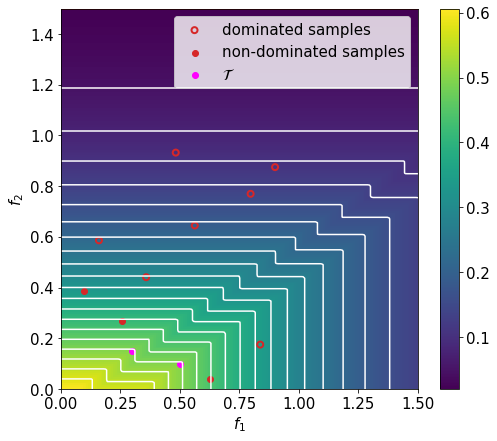

In [12]:
from testsuite.directed_optimisers import DirectedSaf 

osaf_opt = DirectedSaf(objective_function=lambda x: x[0:2], w=.0, targets=targets, ei=False,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
fig_osaf = image_infill(osaf_opt)
fig_osaf.gca().scatter(*np.array(osaf_opt.targets).T, c="magenta", label=r"$\mathcal{T}$")
fig_osaf.gca().legend()
fig_osaf.gca().set_xlabel("$f_1$")
fig_osaf.gca().set_ylabel("$f_2$")
save_fig(fig_osaf, name="figure33_osaf_objective_space")

 /tmp/ipykernel_2093339/418229984.py:25: UserWarning:No contour levels were found within the data range.


0p1


 /tmp/ipykernel_2093339/418229984.py:25: UserWarning:No contour levels were found within the data range.


0p2


 /tmp/ipykernel_2093339/418229984.py:25: UserWarning:No contour levels were found within the data range.


0p4


 /tmp/ipykernel_2093339/418229984.py:25: UserWarning:No contour levels were found within the data range.


0p5


 /tmp/ipykernel_2093339/418229984.py:25: UserWarning:No contour levels were found within the data range.


0p6


 /tmp/ipykernel_2093339/418229984.py:25: UserWarning:No contour levels were found within the data range.


0p8


 /tmp/ipykernel_2093339/418229984.py:25: UserWarning:No contour levels were found within the data range.


0p9


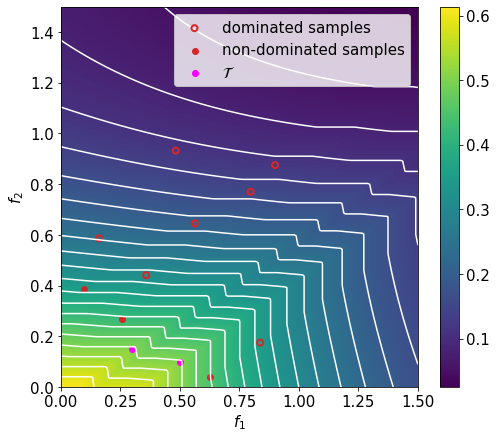

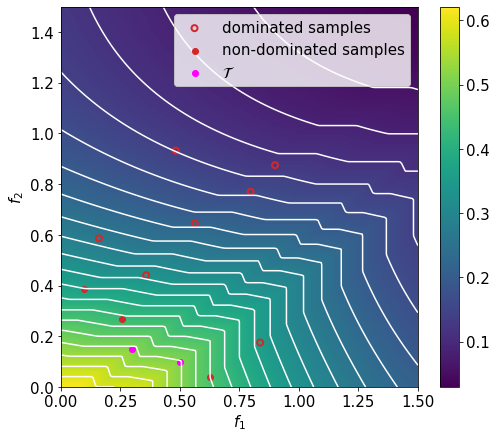

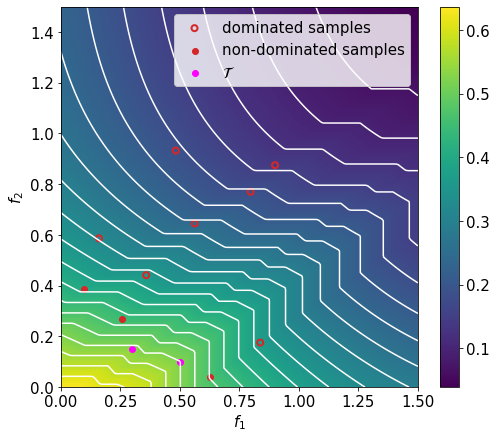

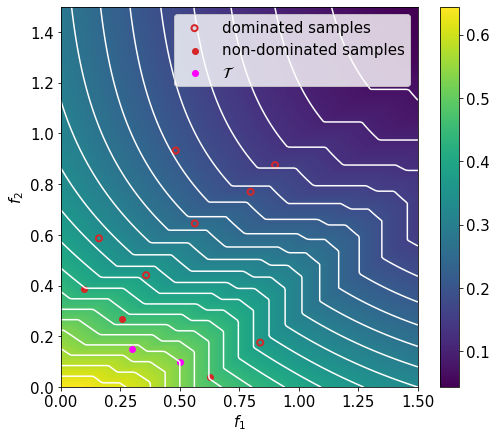

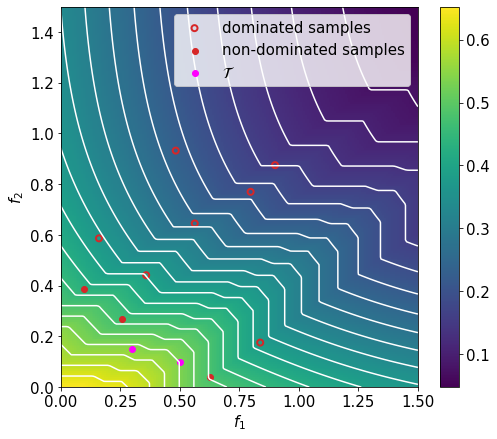

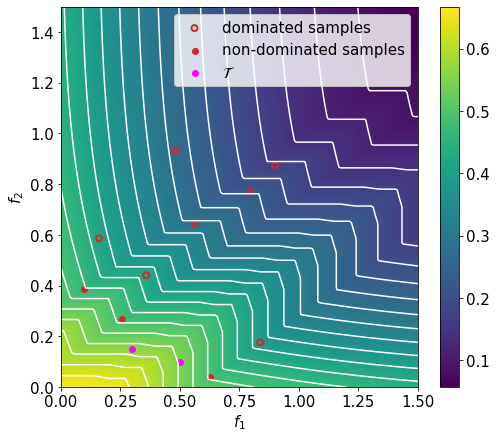

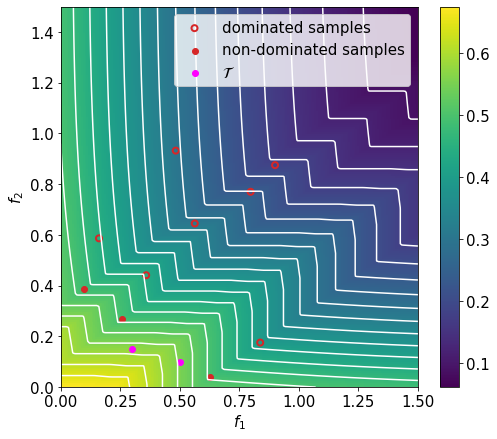

In [14]:
for w in [0.1, 0.2, 0.4, 0.5, 0.6, 0.8, .9]:
    dsaf_opt = DirectedSaf(objective_function=lambda x: x[0:2], w=w, targets=targets, ei=False,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
    fig_dsaf = image_infill(dsaf_opt)
    fig_dsaf.gca().scatter(*np.array(dsaf_opt.targets).T, c="magenta", label=r"$\mathcal{T}$")
    fig_dsaf.gca().legend()
    fig_dsaf.gca().set_xlabel("$f_1$")
    fig_dsaf.gca().set_ylabel("$f_2$")
    save_fig(fig_dsaf, name="figure34_odsaf_objective_space_w_"+f"{w}".replace(".", "p"))
    print(f"{w}".replace(".", "p"))